Uploading the file to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the basic libraries,reading the csv and Data preprocessing


In [ ]:
#Importing the basic libraries
import numpy as np
import pandas as pd

#Loading the E-Vehicle data from a CSV file into a DataFrame

E_vehicle_data = pd.read_csv('/content/drive/My Drive/EVehicle_data.csv')

#Displaying the data for the first 10 rows
E_vehicle_data.head(10)
# Checking data types and identifying missing values
data_info = E_vehicle_data.info()


# Displaying summary statistics to understand the distribution of numerical columns
data_summary = E_vehicle_data.describe()

# Checking for missing values
missing_values = E_vehicle_data.isnull().sum()
data_info, data_summary, missing_values
# Filling the mean value of each column for numerical columns with missing values
numeric_columns = ['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District']

for column in numeric_columns:
    E_vehicle_data[column] = E_vehicle_data[column].fillna(E_vehicle_data[column].mean())


# Dropping rows with missing values only from categorical columns
E_vehicle_data.dropna(subset=['County', 'City', 'Electric Utility', 'Vehicle Location'], inplace=True)

# Confirming the dataset structure and completeness after cleaning and filling the values
E_vehicle_data.info()
# Creating Car Age and Fuel Ranges features in the dataset
current_year = 2024

# Adding Car Age feature
E_vehicle_data['Car Age'] = current_year - E_vehicle_data['Model Year']

# Defining bins and labels for Fuel ranges
bins = [0, 100, 200, 300, float('inf')]
labels = ['Short Range', 'Medium Range', 'Long Range', 'Very Long Range']

# Adding Fuel Efficiency feature
E_vehicle_data['EV Range'] = pd.cut(E_vehicle_data['Electric Range'], bins=bins, labels=labels, right=False)

# Displaying the updated dataset structure to confirm changes
E_vehicle_data.info(), E_vehicle_data[['Car Age', 'EV Range']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

(None,
    Car Age      EV Range
 0        3   Short Range
 1        6    Long Range
 2        8   Short Range
 3        6    Long Range
 4        5  Medium Range)

Importing the Required Libraries for splitting ,training the data

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Selecting the feature and taget variable

In [ ]:
# Select features and the target variable (Electric Range)
features = ['County', 'City', 'Model Year', 'Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP', 'Legislative District', 'Electric Utility', 'Car Age', 'EV Range']

target = 'Electric Range'

X = E_vehicle_data[features]
y = E_vehicle_data[target]

One Hot encoding

In [ ]:
# Performing one-hot encoding on categorical columns
categorical_columns = ['County', 'City', 'Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility','EV Range']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Confirm the shape of the features after encoding
X.shape

(210155, 1235)

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Need to confirm the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168124, 1235), (42031, 1235), (168124,), (42031,))

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # For square root calculation

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

# Training the model
rf_regressor.fit(X_train, y_train)

# Making predictions
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
print("Random Forest Regressor Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Find the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Random Forest Regressor Performance:
R² Score: 0.9998715206101009
Mean Absolute Error (MAE): 0.11561335178709913
Mean Squared Error (MSE): 0.9690728440409917
Root Mean Squared Error (RMSE): 0.9844149755265773


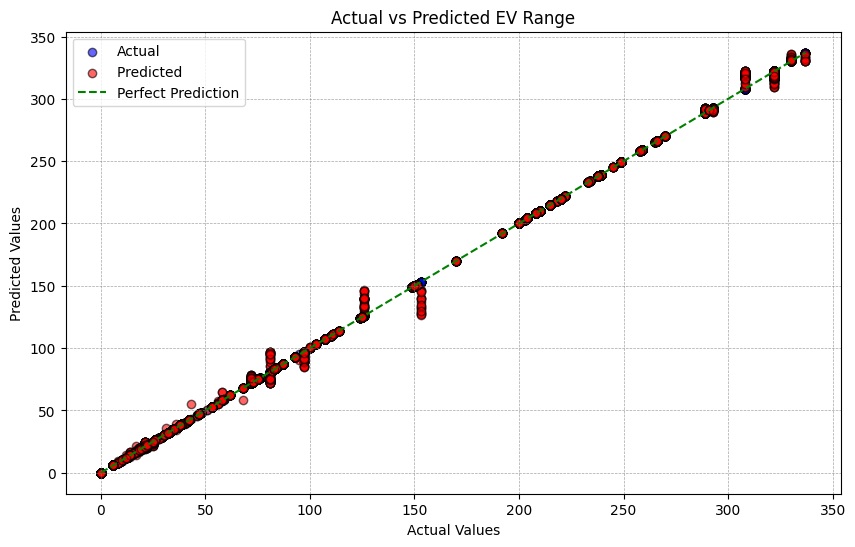

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, c='blue', label='Actual', alpha=0.6, edgecolor='k')
plt.scatter(y_test, y_pred,c='red',alpha=0.6, edgecolors='k', label='Predicted ')
# Adding  gridlines for better viewing
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
# diagonal line for ref
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', label='Perfect Prediction')
# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted EV Range")
plt.legend()
plt.show()


DNN model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 1240.7771 - mean_absolute_error: 13.5210 - val_loss: 125.9701 - val_mean_absolute_error: 3.8898
Epoch 2/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 92.5423 - mean_absolute_error: 3.3710 - val_loss: 83.4161 - val_mean_absolute_error: 2.6163
Epoch 3/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 57.5641 - mean_absolute_error: 2.6185 - val_loss: 63.6141 - val_mean_absolute_error: 2.3606
Epoch 4/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 35.2893 - mean_absolute_error: 2.0880 - val_loss: 55.0843 - val_mean_absolute_error: 2.0430
Epoch 5/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 30.2071 - mean_absolute_error: 1.8528 - val_loss: 50.9420 - val_mean_absolute_error: 2.1147
Epoch 6/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 22.5400 - mean_absolute_error: 1.6695 - val_loss: 43.5209 - val_mean_absolute_error: 1.6588
Epoch 7/50
4204/4204 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 18.

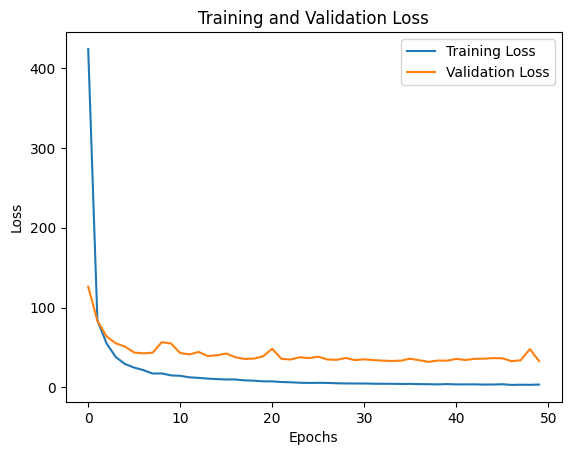

In [ ]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data for better neural network performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a Deep Neural Network (DNN) model for regression
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Visualize training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

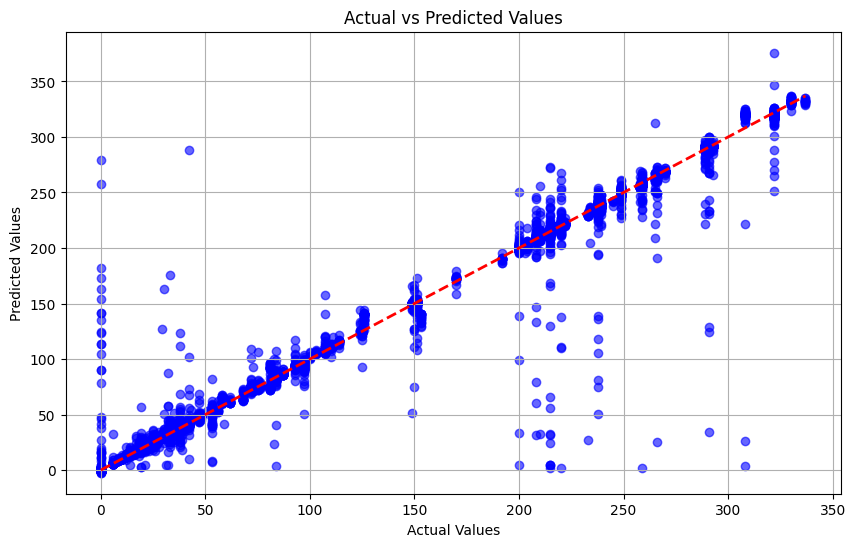

In [ ]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')  # Scatter plot for actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

ANAMOLY DETECTION USING ISOLATION FOREST


Total anomalies detected: 10248
Sample anomalies:
    Electric Range  Base MSRP  Car Age
13           265.0    59900.0       12
18           208.0        0.0        9
23           208.0        0.0        9
92            16.0    52650.0        6
93            73.0        0.0       13


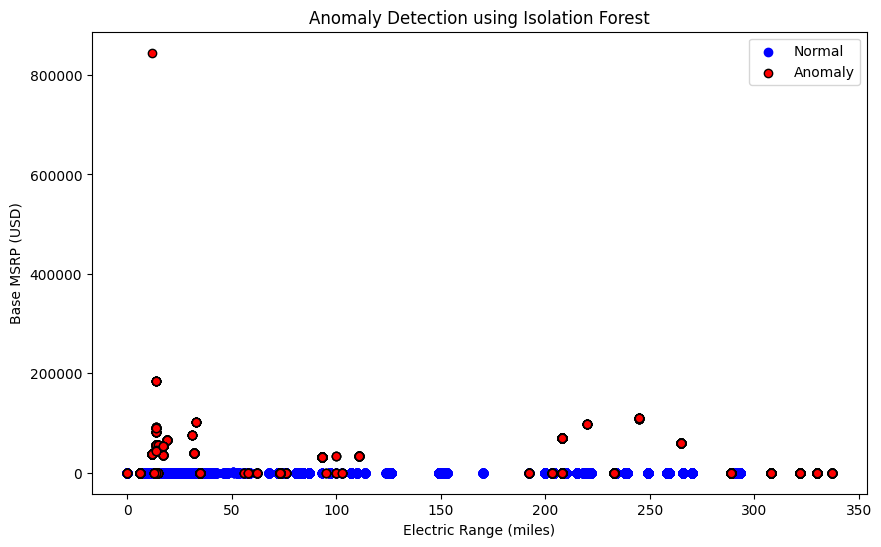

In [ ]:
# Importing necessary libraries for Isolation Forest
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Selecting numerical features for Isolation Forest
# We are focusing on numerical columns relevant to anomaly detection
iso_features = ['Electric Range', 'Base MSRP', 'Car Age']

# Filtering the dataset for Isolation Forest input
E_vehicle_data_filtered = E_vehicle_data[iso_features]

# Initializing Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fitting the model on selected features
iso_forest.fit(E_vehicle_data_filtered)

# Predicting anomalies (1: Normal, -1: Anomaly)
E_vehicle_data['Anomaly'] = iso_forest.predict(E_vehicle_data_filtered)

# Separating anomalies and normal data
anomalies = E_vehicle_data[E_vehicle_data['Anomaly'] == -1]
normal_data = E_vehicle_data[E_vehicle_data['Anomaly'] == 1]

# Displaying anomaly summary
print("Total anomalies detected:", len(anomalies))
print("Sample anomalies:")
print(anomalies[['Electric Range', 'Base MSRP', 'Car Age']].head())

# Visualization: Electric Range vs. Base MSRP with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['Electric Range'], normal_data['Base MSRP'], c='blue', label='Normal')
plt.scatter(anomalies['Electric Range'], anomalies['Base MSRP'], c='red', label='Anomaly', edgecolor='k')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP (USD)')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()